In [2]:
from segmentator import Segmentator
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import torch

/work3/s183920/02514-DLCI/DLCI-venv/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/work3/s183920/02514-DLCI/DLCI-venv/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
segm = Segmentator(use_wandb=False, dataset = "Lesion", num_epochs = 3, model = "SimpleCNN")
segm.set_seed(42)

Using device: cpu
Loading dataset: Lesion
Loaded 128 training images
Loaded 40 test images
Loaded 32 validation images


In [4]:
segm.train()

* Epoch 1/3
Validation loss: 0.7402979830900828
 - loss: 0.742878
* Epoch 2/3
Validation loss: 0.7391101121902466
 - loss: 0.678830
* Epoch 3/3
Validation loss: 0.7385634481906891
 - loss: 0.669572


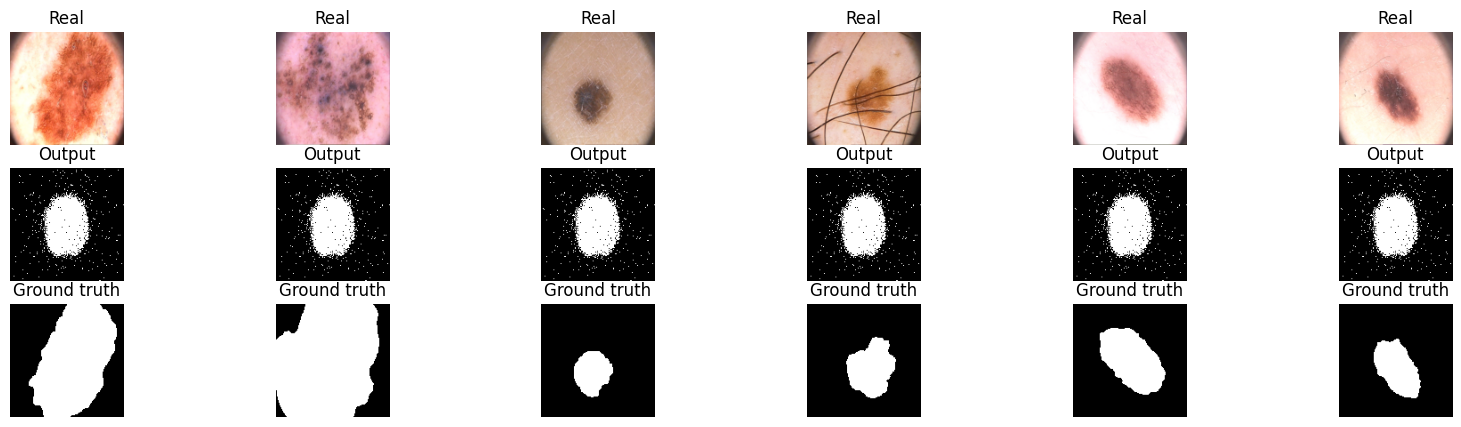

In [11]:
X_test, Y_test = next(iter(segm.val_loader))

# show intermediate results
segm.model.eval()  # testing mode
Y_hat = F.sigmoid(segm.model(X_test.to(segm.device))).detach().cpu()



fig, axes = plt.subplots(3, 6, figsize=(20, 5))
for k in range(6):
    
    # show input image
    ax = axes[0, k]
    ax.imshow(np.rollaxis(X_test[k].numpy(), 0, 3), cmap='gray')
    ax.set_title('Real')
    ax.set_axis_off()

    # show mask prediction
    ax = axes[1, k]
    ax.imshow(Y_hat[k, 0] > 0.7, cmap='gray')
    ax.set_title('Output')
    ax.set_axis_off()
    
    # show ground truth mask
    ax = axes[2, k]
    ax.imshow(Y_test[k, 0], cmap='gray')
    ax.set_title('Ground truth')
    ax.set_axis_off()

(array([1.3339e+04, 7.0000e+00, 7.0000e+00, 5.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 3.0110e+03]),
 array([0.5       , 0.52310586, 0.54621172, 0.56931758, 0.59242344,
        0.6155293 , 0.63863516, 0.66174102, 0.68484688, 0.70795274,
        0.7310586 ]),
 <BarContainer object of 10 artists>)

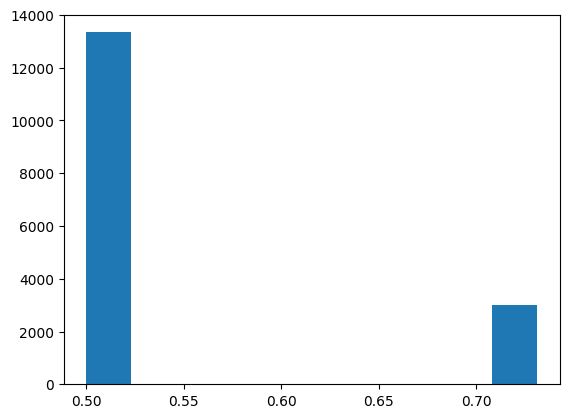

In [8]:
plt.hist(Y_hat[0].flatten())

Using device: cpu
Loading dataset: Lesion
Loaded 128 training images
Loaded 40 test images
Loaded 32 validation images


/work3/s183920/02514-DLCI/DLCI-venv/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)


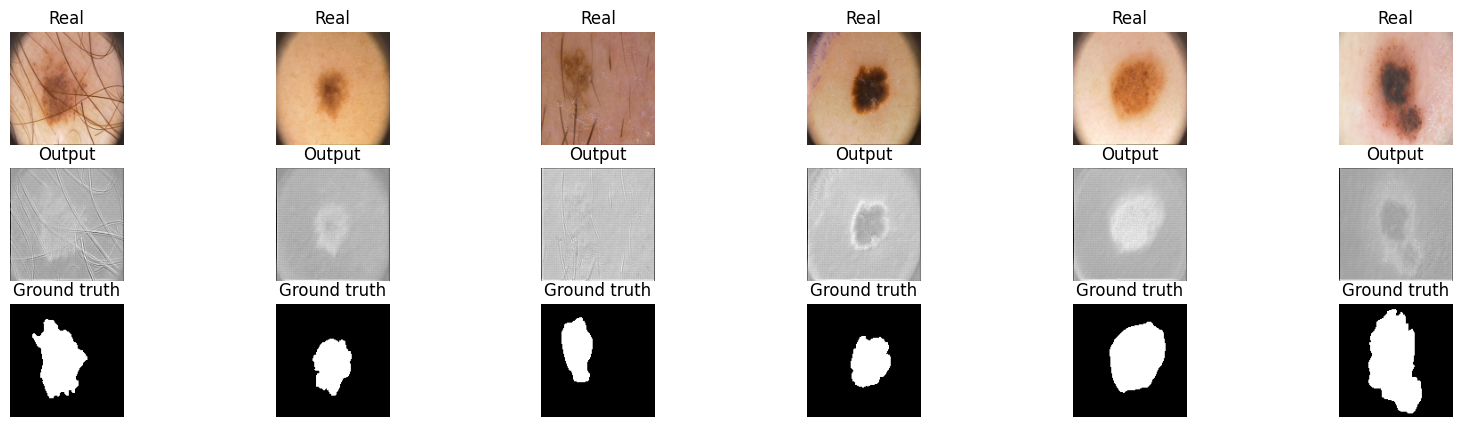

In [12]:
segm = Segmentator(use_wandb=False, dataset = "Lesion", num_epochs = 3)
segm.set_seed(42)

X_test, Y_test = next(iter(segm.val_loader))

# show intermediate results
segm.model.eval()  # testing mode
Y_hat = F.sigmoid(segm.model(X_test.to(segm.device))).detach().cpu()



fig, axes = plt.subplots(3, 6, figsize=(20, 5))
for k in range(6):
    
    # show input image
    ax = axes[0, k]
    print(X_test[k].numpy().shape)
    ax.imshow(np.rollaxis(X_test[k].numpy(), 0, 3), cmap='gray')
    ax.set_title('Real')
    ax.set_axis_off()

    # show mask prediction
    ax = axes[1, k]
    ax.imshow(Y_hat[k, 0], cmap='gray')
    ax.set_title('Output')
    ax.set_axis_off()
    
    # show ground truth mask
    ax = axes[2, k]
    ax.imshow(Y_test[k, 0], cmap='gray')
    ax.set_title('Ground truth')
    ax.set_axis_off()

In [ ]:
X_test, Y_test = next(iter(segm.val_loader))

# show intermediate results
segm.model.eval()  # testing mode
Y_hat = F.sigmoid(segm.model(X_test.to(segm.device))).detach().cpu()



fig, axes = plt.subplots(3, 6, figsize=(20, 5))
for k in range(6):
    
    # show input image
    ax = axes[0, k]
    print(X_test[k].numpy().shape)
    ax.imshow(np.rollaxis(X_test[k].numpy(), 0, 3), cmap='gray')
    ax.set_title('Real')
    ax.set_axis_off()

    # show mask prediction
    ax = axes[1, k]
    ax.imshow(Y_hat[k, 0], cmap='gray')
    ax.set_title('Output')
    ax.set_axis_off()
    
    # show ground truth mask
    ax = axes[2, k]
    ax.imshow(Y_test[k, 0], cmap='gray')
    ax.set_title('Ground truth')
    ax.set_axis_off()

In [9]:
segm.val_loader.dataset.__getitem__(0)

(tensor([[[0.1922, 0.1922, 0.2039,  ..., 0.1882, 0.2000, 0.6784],
          [0.1882, 0.1922, 0.2000,  ..., 0.1843, 0.2039, 0.6784],
          [0.1961, 0.2039, 0.2196,  ..., 0.2039, 0.2078, 0.6824],
          ...,
          [0.2314, 0.2353, 0.2275,  ..., 0.2157, 0.2314, 0.6902],
          [0.2392, 0.2431, 0.2392,  ..., 0.2235, 0.2392, 0.6941],
          [0.6980, 0.7020, 0.7020,  ..., 0.6902, 0.6980, 0.8784]],
 
         [[0.1804, 0.1804, 0.1882,  ..., 0.1843, 0.1882, 0.6745],
          [0.1843, 0.1882, 0.1922,  ..., 0.1882, 0.1922, 0.6745],
          [0.1843, 0.1843, 0.1922,  ..., 0.1843, 0.1922, 0.6745],
          ...,
          [0.2039, 0.1961, 0.1922,  ..., 0.1843, 0.1961, 0.6824],
          [0.2157, 0.2118, 0.2039,  ..., 0.1961, 0.2078, 0.6863],
          [0.6902, 0.6863, 0.6863,  ..., 0.6824, 0.6902, 0.8745]],
 
         [[0.1961, 0.2039, 0.2039,  ..., 0.1882, 0.2157, 0.6863],
          [0.1961, 0.2118, 0.2157,  ..., 0.1961, 0.2118, 0.6863],
          [0.1961, 0.2039, 0.2157,  ...,

In [33]:
print(f"{np.random.rand():.3f}")

0.183
